# Timeline Visualization

Notebook to visualize how accesses move across data during an iteration.

Idea: make a 2d plot where x is the time of access, y is the coordinate accessed.

In [1]:
# import the miniapp code and numpy for data management
import main
import numpy as np

In [2]:
# Timeline object to keep a trace of time of accesses
class Timeline:
    pass

In [3]:
# Subclass an object of the miniapp to trace some of its functions
class TracedHamiltonian(main.Hamiltonian):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # save the timeline as a list of accesses
        self.timeline = []
        self.time = 0
        self.block = 1
        
    def reset_trace(self):
        self.timeline = []
        self.time = 0
        
    def H_two_e(self, i, j, k, l):
        timeblock = int(self.time / self.block)
        self.timeline.append((timeblock, i,j,k,l))
        self.time += 1
        return super().H_two_e(i,j,k,l)
    
    def view2d(self):
        # figure out the size of the integrals space
        maxs = [0,0,0,0]
        for t in self.d_two_e_integral:
            for i,x in enumerate(t):
                maxs[i] = max(maxs[i], x)
        # create a 4d version of the timeline
        maxs = [ i+1 for i in maxs]
        v = np.zeros(tuple(maxs))
        for x in self.timeline:
            t, i, j, k, l = x
            v[i,j,k,l] = t
        # return a 2d view of it
        d = maxs[0] * maxs[1]
        return v.reshape((d,d))

In [4]:
fci_path = 'f2_631g.FCIDUMP'
wf_path = 'f2_631g.30det.wf'
N_ord, E0, d_one_e_integral, d_two_e_integral = main.load_integrals(f"data/{fci_path}")
psi_coef, psi_det = main.load_wf(f"data/{wf_path}")
lewis = TracedHamiltonian(d_one_e_integral, d_two_e_integral, E0)

In [5]:
#fci_path='c2_eq_hf_dz.fcidump*'
#wf_path='c2_eq_hf_dz_3.*.wf*'
#N_ord, E0, d_one_e_integral, d_two_e_integral = main.load_integrals(f"data/{fci_path}")
#psi_coef, psi_det = main.load_wf(f"data/{wf_path}")
#lewis = TracedHamiltonian(d_one_e_integral, d_two_e_integral, E0)

In [6]:
main.Powerplant(lewis, psi_det).E(psi_coef)

-198.73878098910563

In [7]:
print(len(lewis.timeline))

7360


In [8]:
view = lewis.view2d()

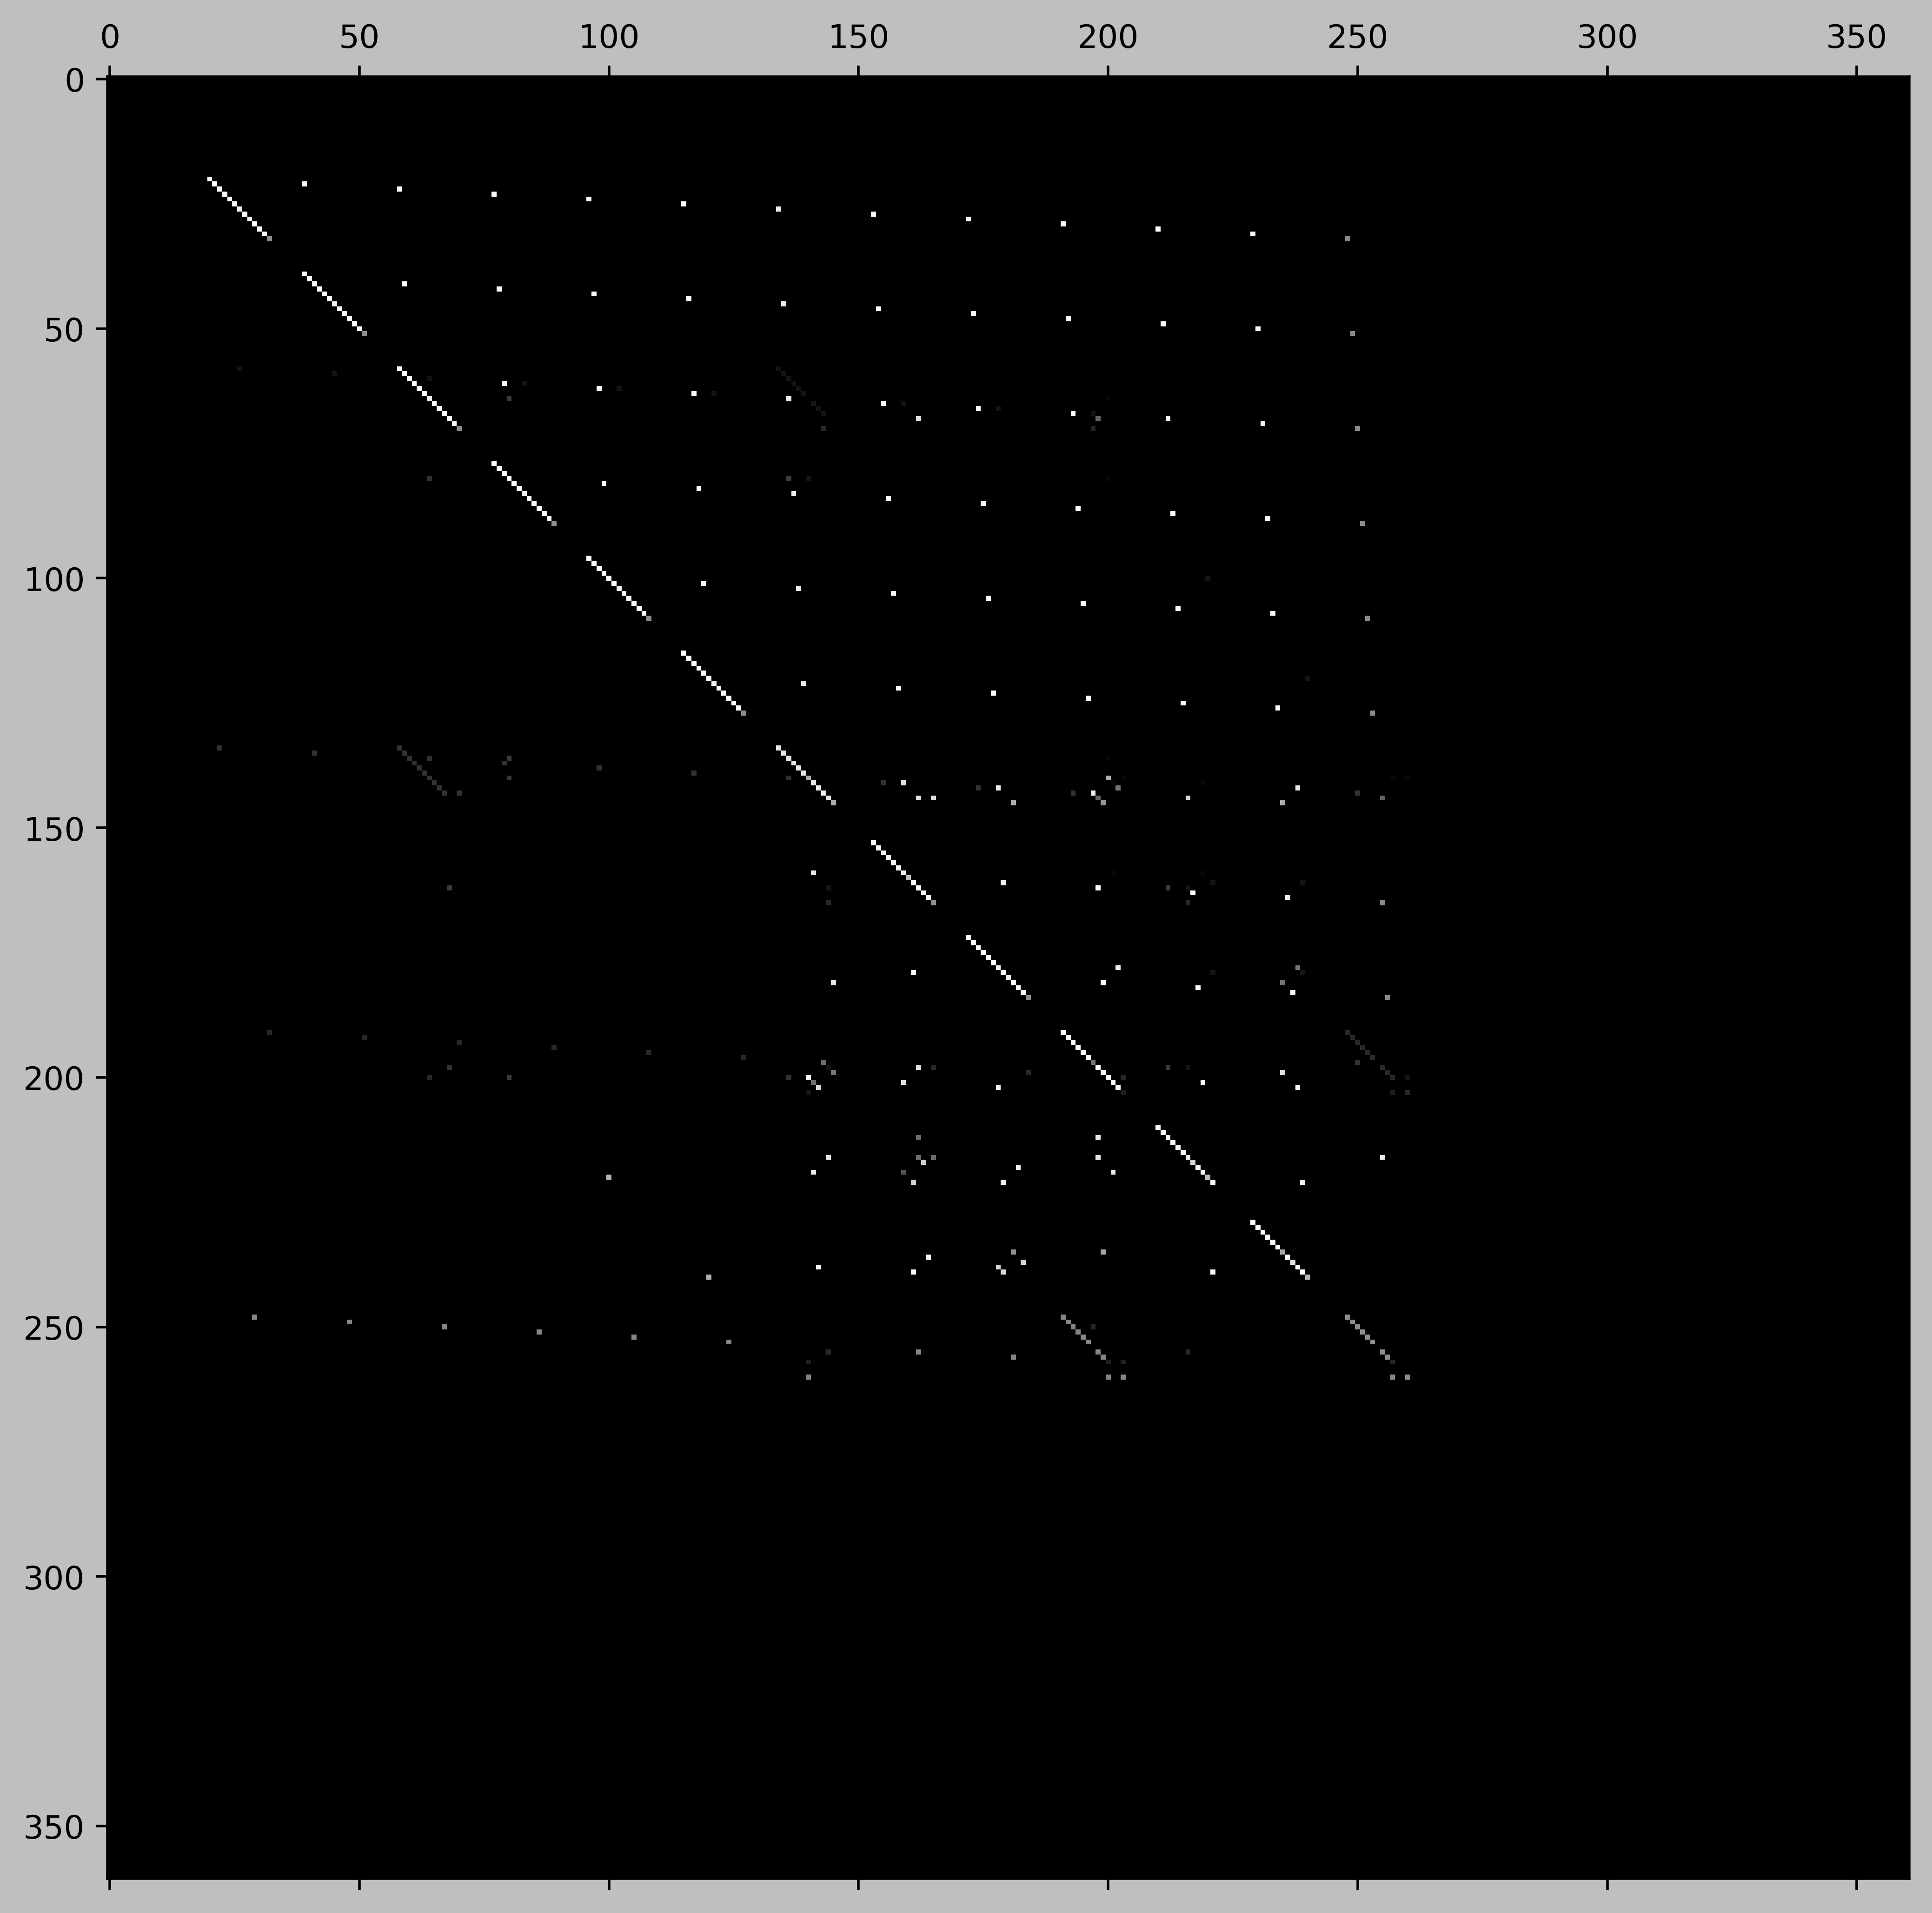

In [9]:
import matplotlib.pyplot as plt

plt.style.use('grayscale')
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 500
plt.matshow(view)

In [10]:
from main import selection_step
maps = []
n = 5
for i in range(2):
    _, psi_coef, psi_det = selection_step(lewis, N_ord, psi_coef, psi_det, n)
    maps.append(lewis.view2d())
    n = n*2

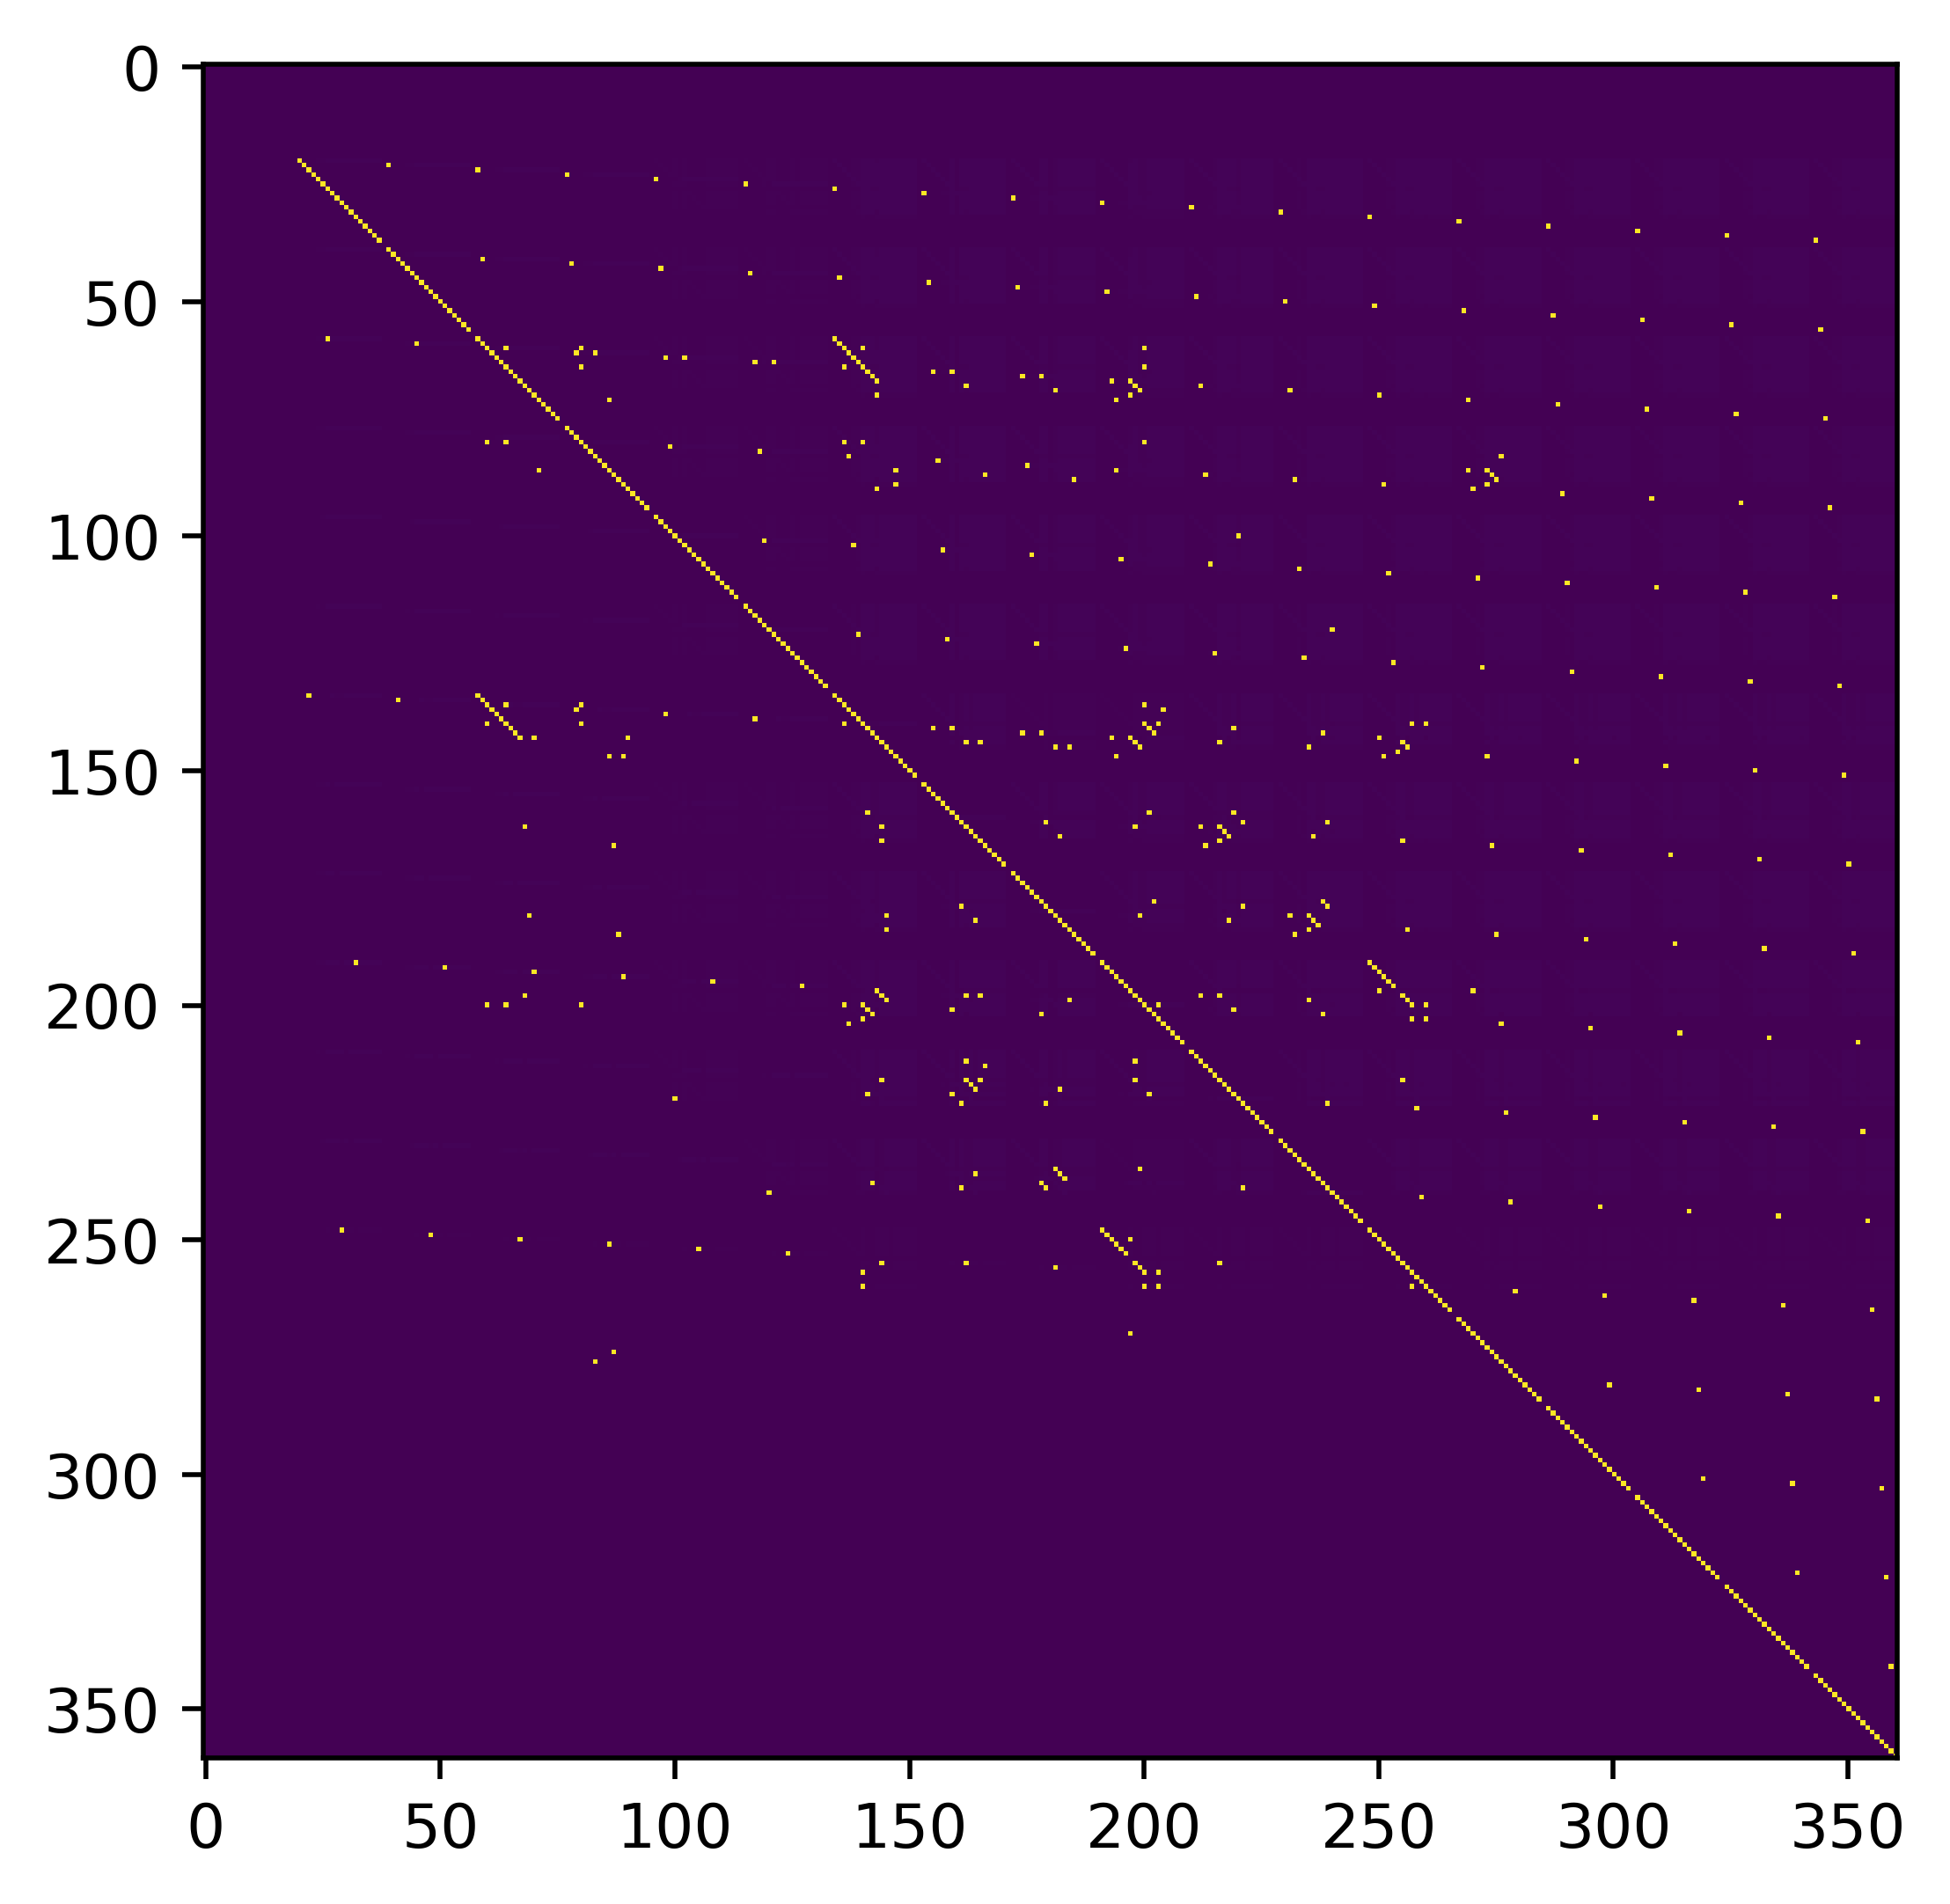

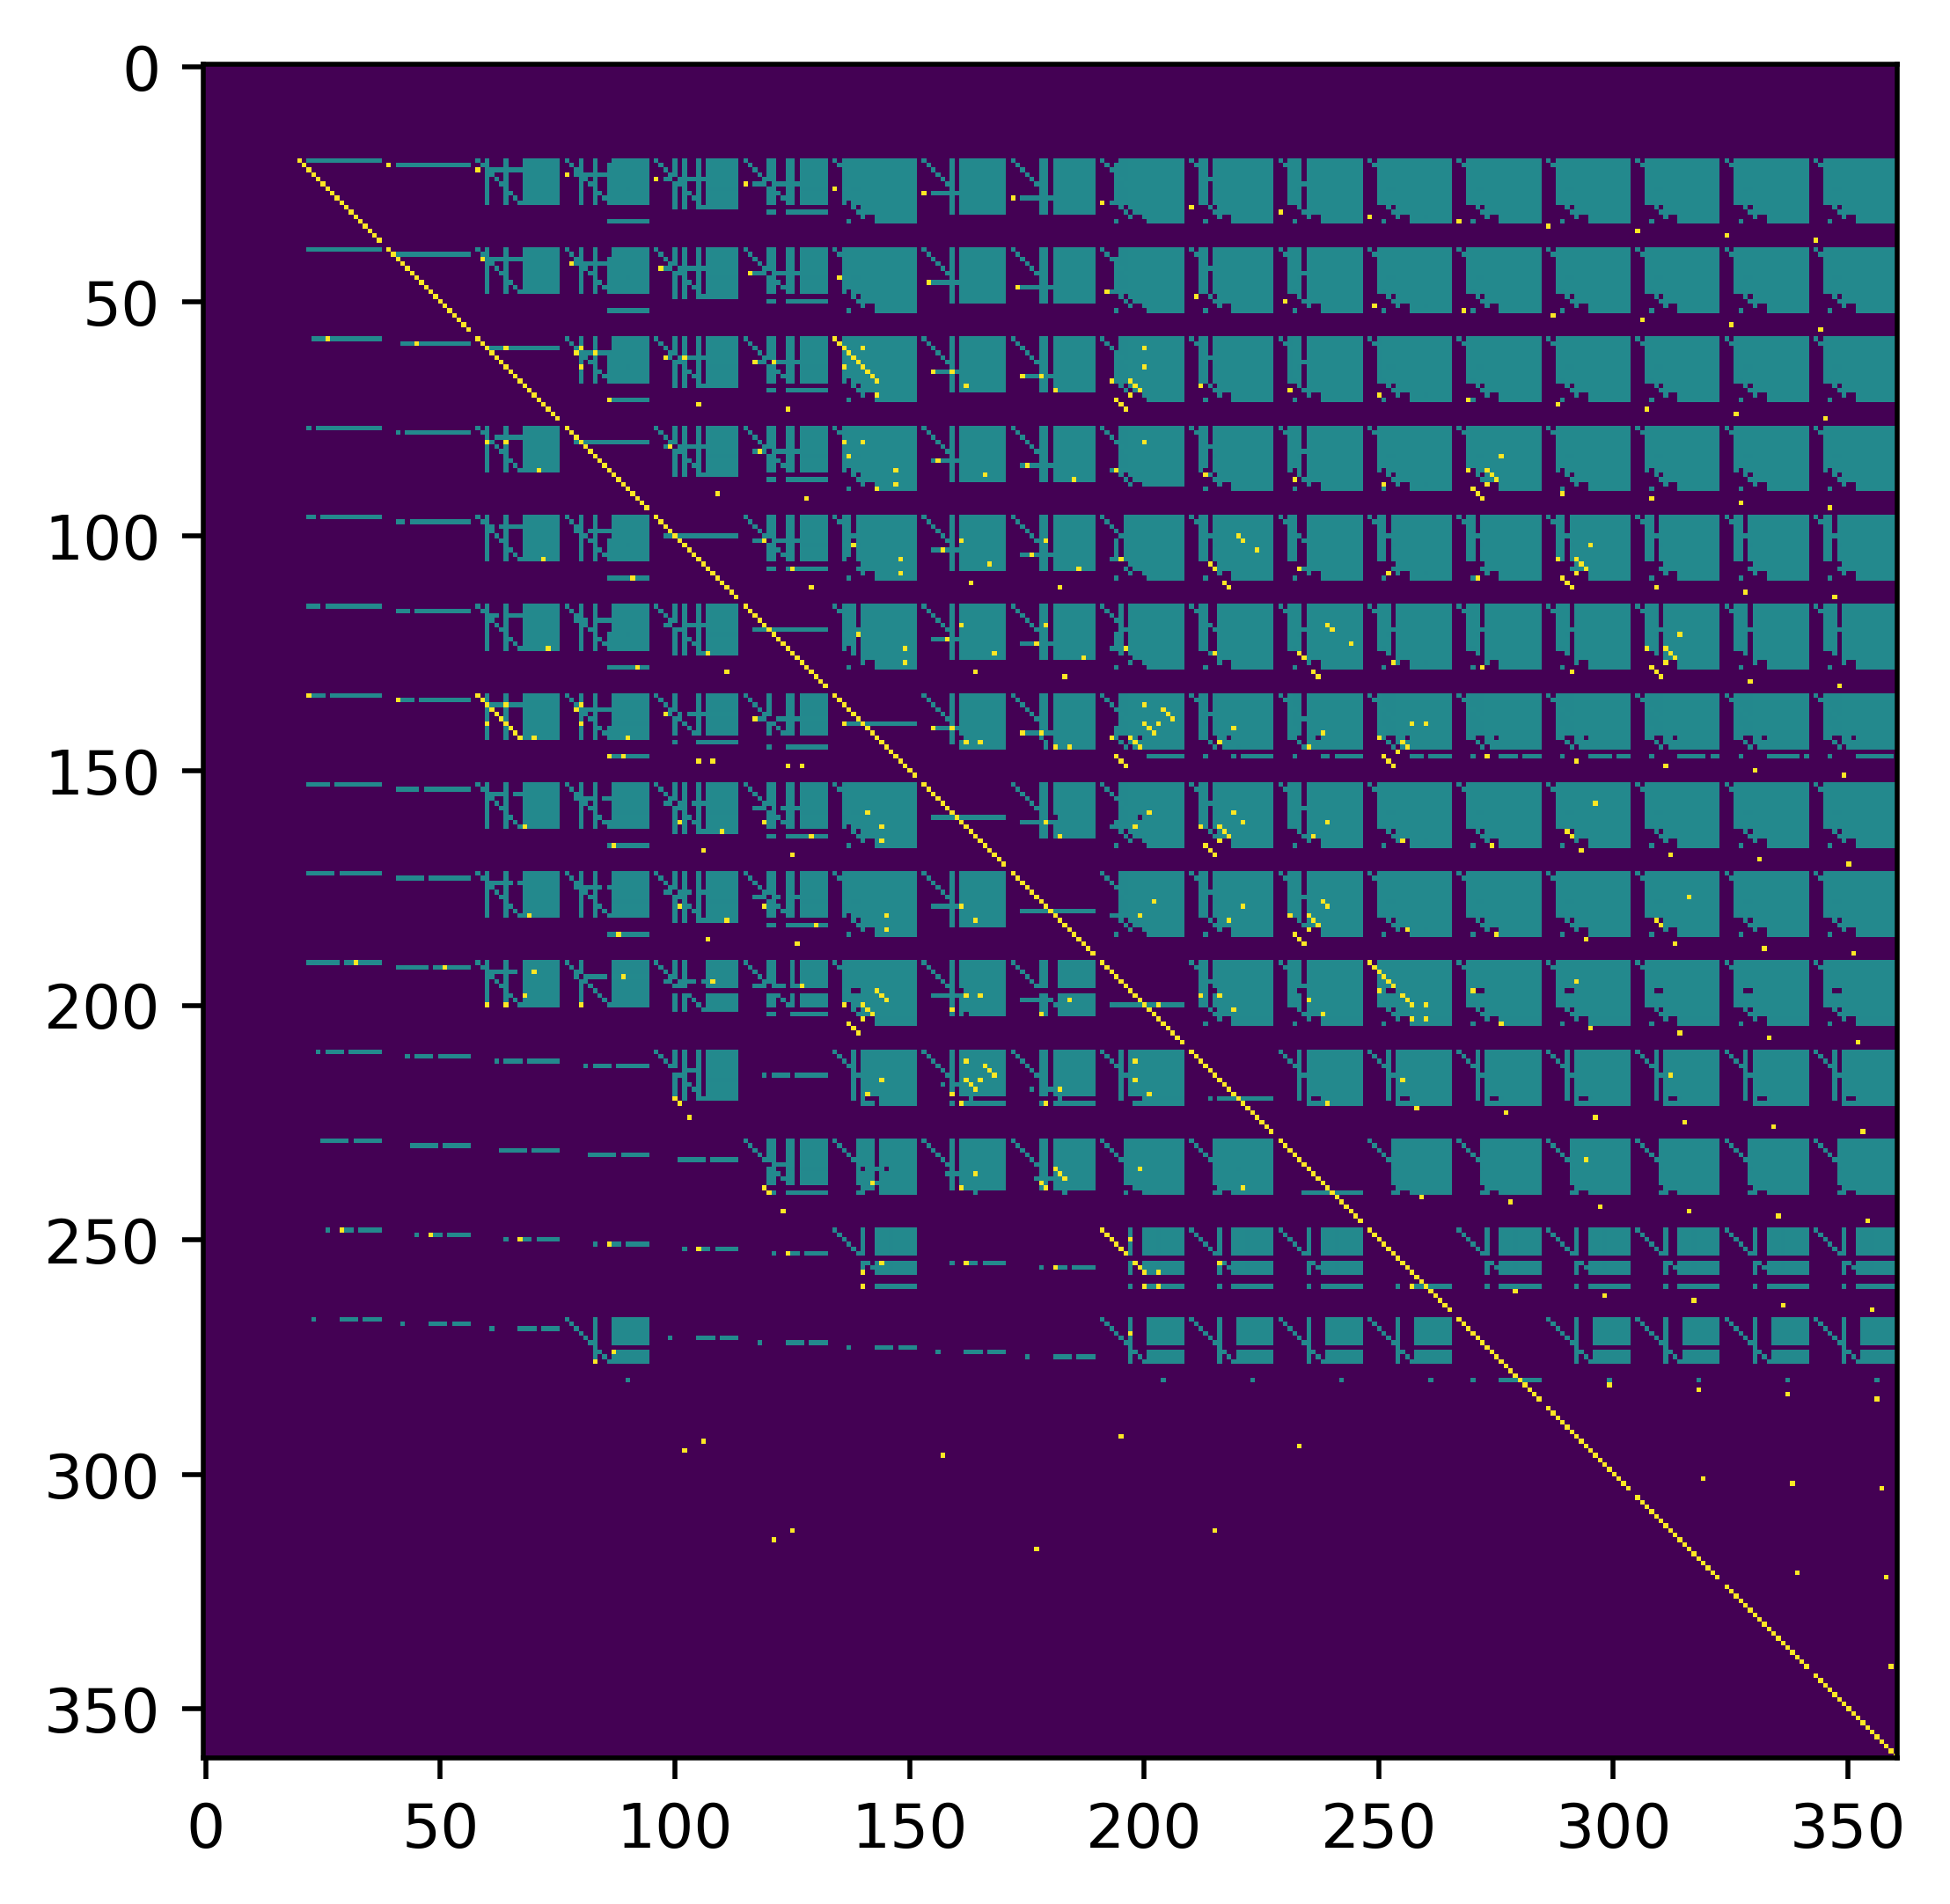

In [17]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 500
for m in maps:
    plt.imshow(m, cmap='viridis')
    plt.show()